## Train-test split

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", 500)

random_seed = 2024
np.random.seed(random_seed)

In [288]:
bottle_data_path = '../data/bottle'

In [289]:
bottle_df = pd.read_csv(f'{bottle_data_path}/bottle_01.csv', index_col=0)

In [290]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510592 entries, 0 to 536964
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   R_Depth     510592 non-null  float64
 1   R_TEMP      507022 non-null  float64
 2   R_SALINITY  510592 non-null  float64
 3   R_SIGMA     507018 non-null  float64
 4   R_SVA       507022 non-null  float64
 5   R_DYNHT     506842 non-null  float64
 6   R_O2        387973 non-null  float64
 7   R_O2Sat     387003 non-null  float64
 8   R_SIO3      217345 non-null  float64
 9   R_PO4       236798 non-null  float64
 10  R_NO3       205931 non-null  float64
 11  R_NO2       205930 non-null  float64
 12  R_NH4       43565 non-null   float64
 13  R_CHLA      145661 non-null  float64
 14  R_PHAEO     145657 non-null  float64
 15  R_PRES      510592 non-null  float64
 16  Lat_Dec     510592 non-null  float64
 17  Lon_Dec     510592 non-null  float64
dtypes: float64(18)
memory usage: 74.0 MB


Perform a random train-test split of the data. R_SALINITY is a target feature here.

In [291]:
bottle_df_train, bottle_df_test = train_test_split(bottle_df, test_size=0.2, random_state=random_seed)

print(bottle_df_train.shape, bottle_df_test.shape)

(408473, 18) (102119, 18)


## Exploring the data

Let's explore the distribution of the features, and investigate the missing values.

In [292]:
def hist_plot(dataset, f_size=(10, 5)):
    plt.figure(figsize=f_size)
    sns.histplot(data=dataset, kde=False, bins=50)
    plt.plot()

def box_plot(dataset, f_size=(10, 5)):
    plt.figure(figsize=f_size)
    sns.boxplot(data=dataset.values)
    plt.plot()

### R_Depth

Reported Depth (from pressure) in meters

In [293]:
# missing values
bottle_df_train['R_Depth'].isnull().sum()

0

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


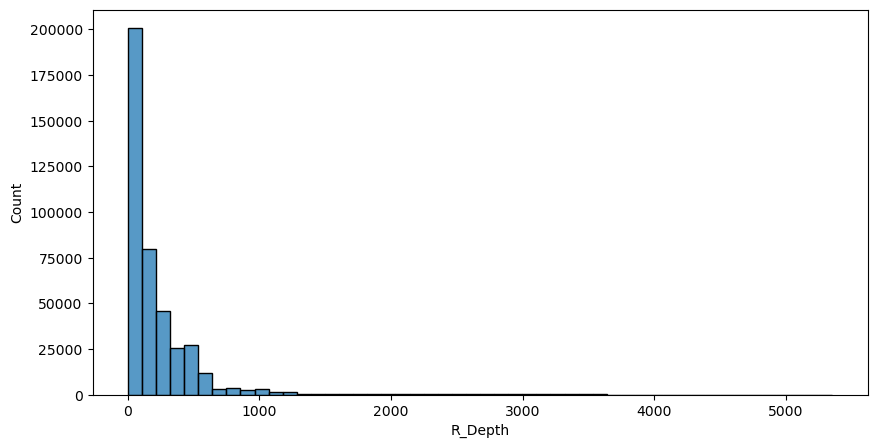

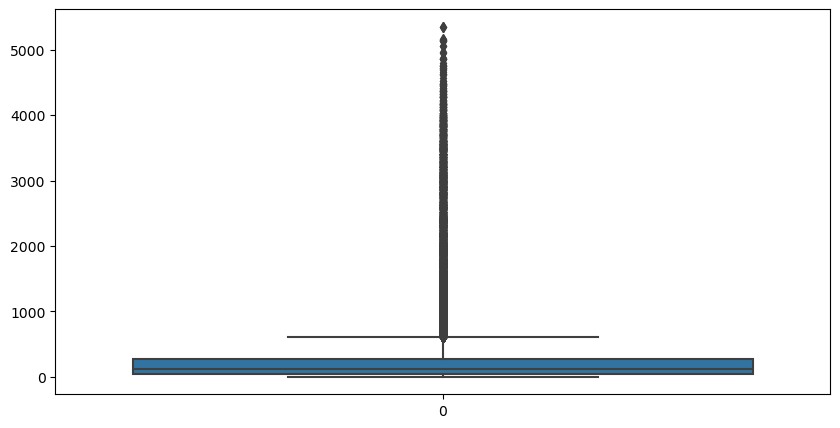

In [294]:
hist_plot(bottle_df_train['R_Depth'])
box_plot(bottle_df_train['R_Depth'])


#### R_TEMP

Reported Temperature

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


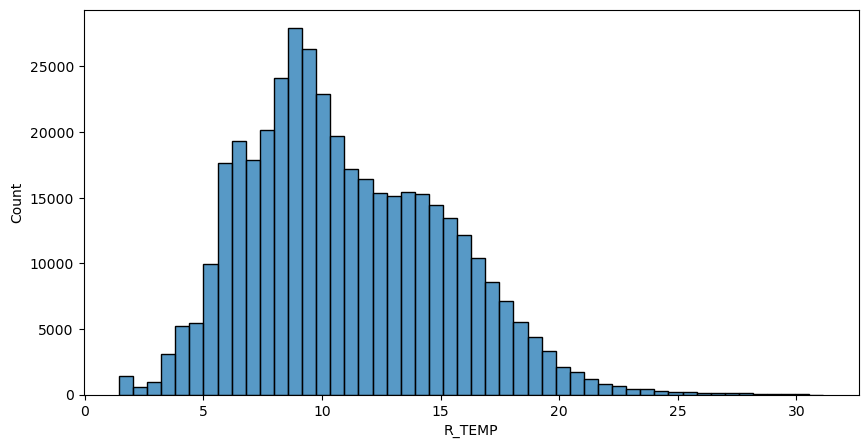

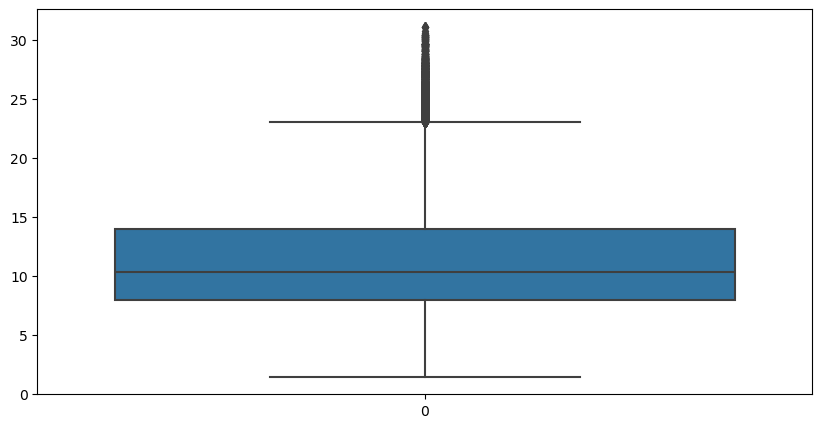

In [295]:
hist_plot(bottle_df_train['R_TEMP'])
box_plot(bottle_df_train['R_TEMP'])

In [296]:
print(bottle_df_train['R_TEMP'].isnull().sum(), bottle_df_test['R_TEMP'].isnull().sum())

2912 658


In [297]:
bottle_df_train['R_TEMP'].describe()

count    405561.000000
mean         11.023257
std           4.142635
min           1.440000
25%           7.970000
50%          10.340000
75%          13.990000
max          31.140000
Name: R_TEMP, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


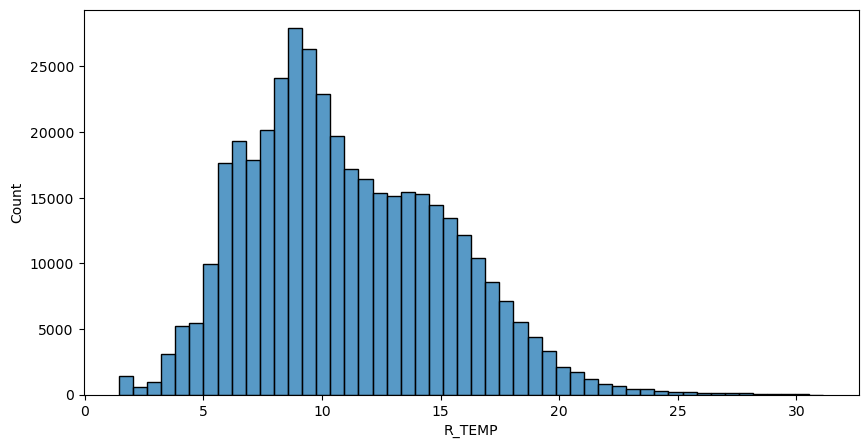

In [298]:
hist_plot(bottle_df_train['R_TEMP'])

#### R_SALINITY - target feature

Reported Salinity

In [299]:
bottle_df_train['R_SALINITY'].describe()

count    408473.000000
mean         33.820325
std           0.459681
min          28.431000
25%          33.477000
50%          33.823000
75%          34.174000
max          37.034000
Name: R_SALINITY, dtype: float64

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


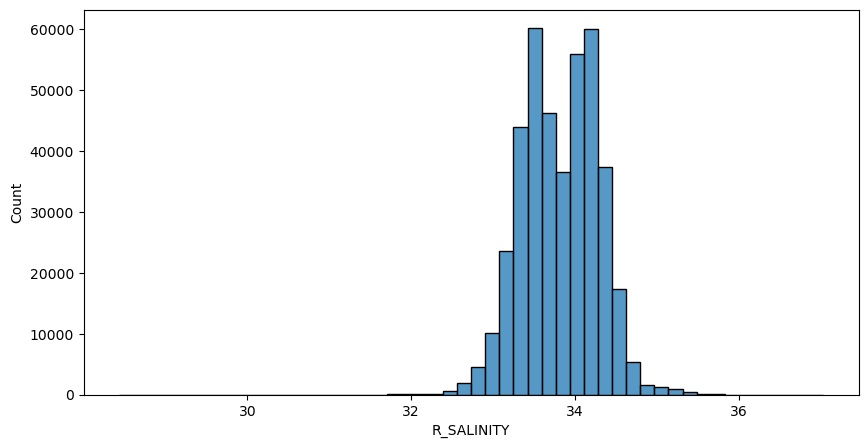

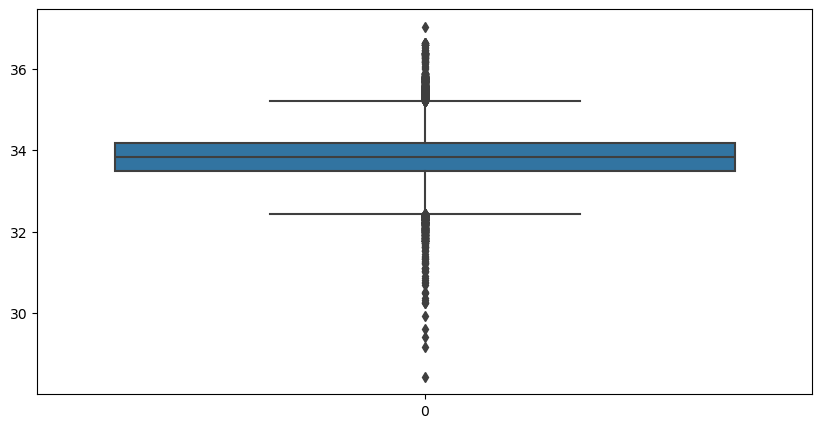

In [300]:
hist_plot(bottle_df_train['R_SALINITY'])
box_plot(bottle_df_train['R_SALINITY'])

#### R_SIGMA

Reported Potential Density of water

In [301]:
print(bottle_df_train['R_SIGMA'].isnull().sum(), bottle_df_test['R_SIGMA'].isnull().sum())

2915 659


Even though this number might seem high, it is less than 1 percent.

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


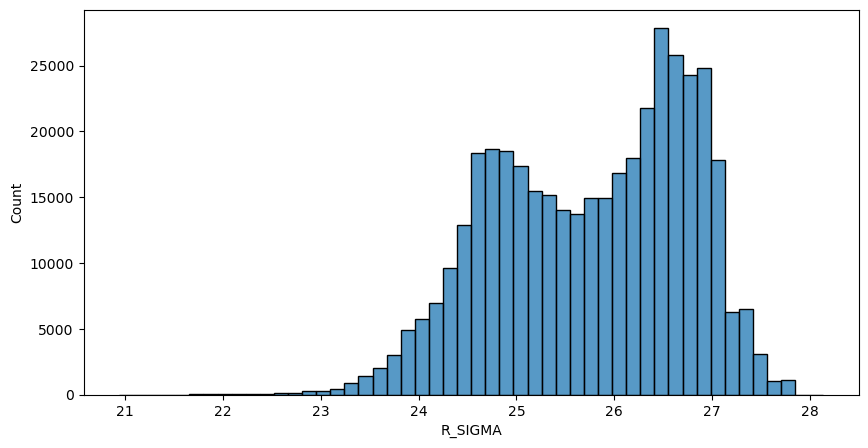

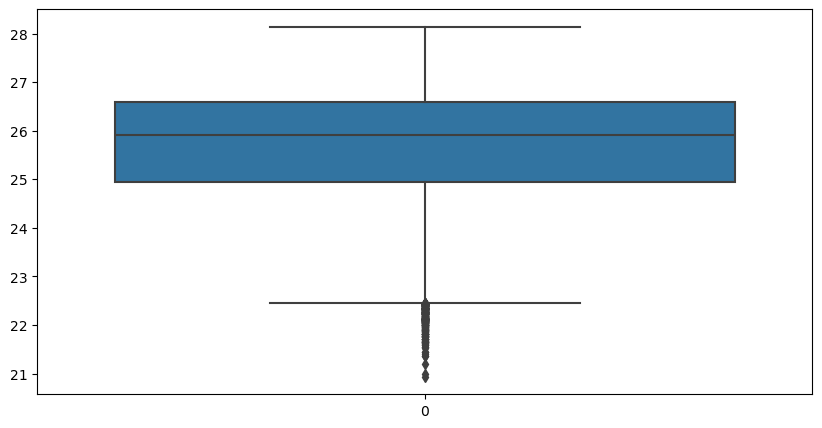

In [302]:
hist_plot(bottle_df_train['R_SIGMA'])
box_plot(bottle_df_train['R_SIGMA'])

#### R_SVA

Reported Specific Volume Anomaly

In [303]:
bottle_df_train['R_SVA'].describe()

count    405561.000000
mean        224.581790
std          91.961218
min           7.300000
25%         147.000000
50%         210.600000
75%         301.400000
max         683.400000
Name: R_SVA, dtype: float64

In [304]:
bottle_df_train['R_SVA'].isnull().sum()

2912

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


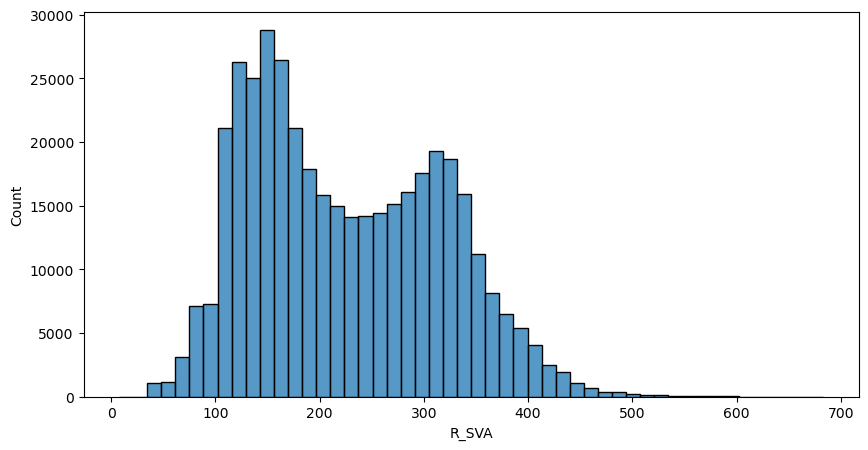

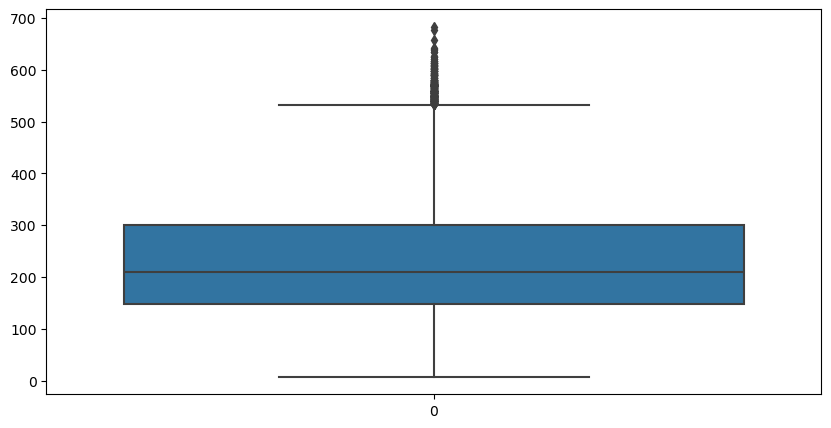

In [305]:
hist_plot(bottle_df_train['R_SVA'])
box_plot(bottle_df_train['R_SVA'])

#### R_DYNHT

Reported Dynamic Height in units of dynamic meters (work per unit mass)

In [306]:
print(bottle_df_train['R_DYNHT'].isnull().sum(), bottle_df_test['R_DYNHT'].isnull().sum())

3033 717


The number of missing values is < 1%

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


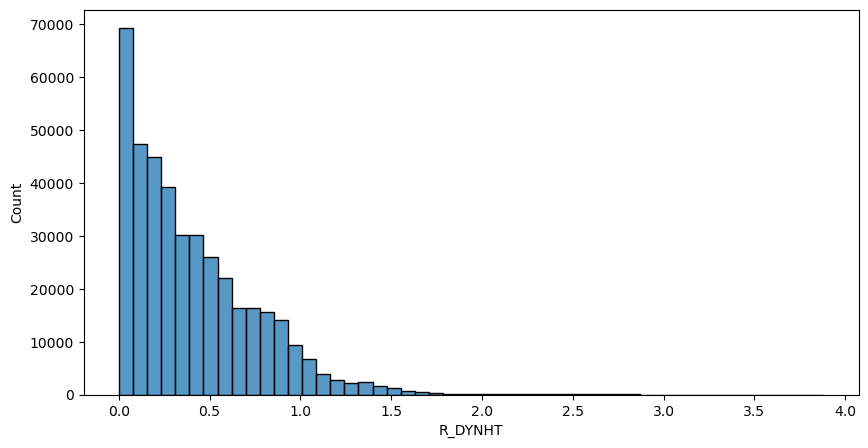

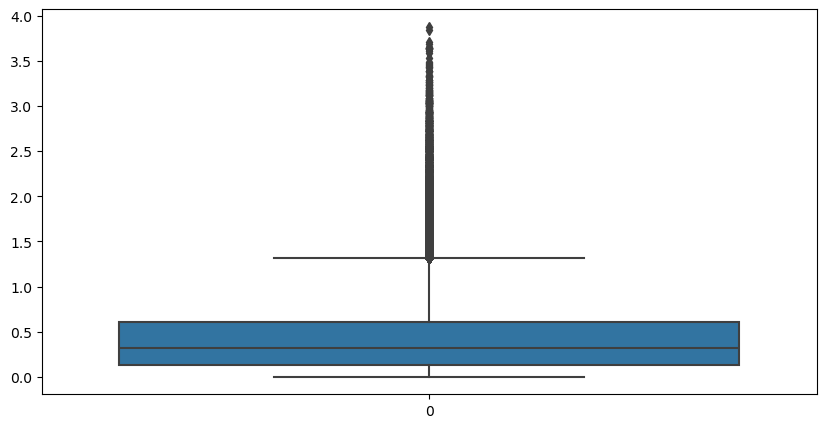

In [307]:
hist_plot(bottle_df_train['R_DYNHT'])
box_plot(bottle_df_train['R_DYNHT'])

#### R_O2

Here the multimodality is prominent. Also some of the values are negative, replace them with zero.

In [308]:
print(bottle_df_train['R_O2'].isnull().sum(), bottle_df_test['R_O2'].isnull().sum())

98127 24492


In [309]:
print(bottle_df_train[bottle_df_train['R_O2'] < 0].shape, bottle_df_test[bottle_df_test['R_O2'] < 0].shape)

bottle_df_train.loc[bottle_df_train['R_O2'] < 0, 'R_O2'] = np.nan
bottle_df_test.loc[bottle_df_test['R_O2'] < 0, 'R_O2'] = np.nan

print(bottle_df_train[bottle_df_train['R_O2'] < 0].shape, bottle_df_test[bottle_df_test['R_O2'] < 0].shape)

(3, 18) (1, 18)
(0, 18) (0, 18)


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


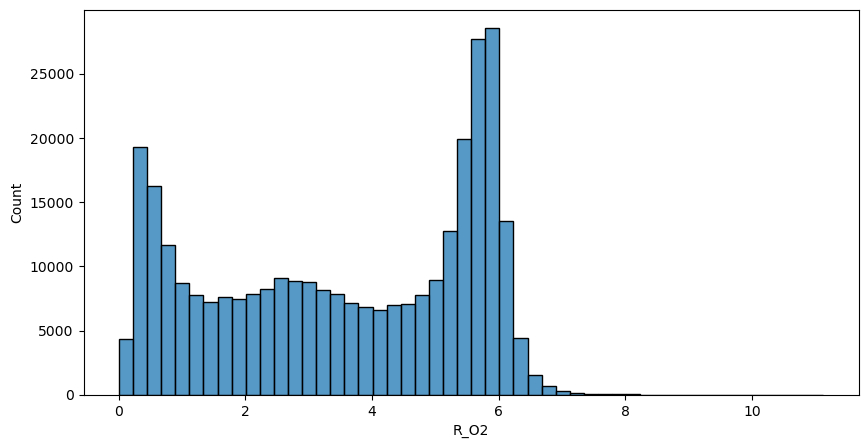

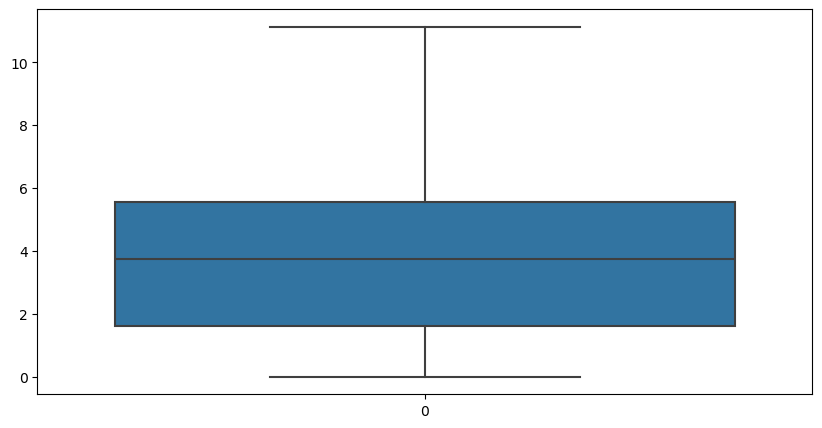

In [310]:
hist_plot(bottle_df_train['R_O2'])
box_plot(bottle_df_train['R_O2'])

In [311]:
print(bottle_df_train['R_O2'].isnull().sum(), bottle_df_test['R_O2'].isnull().sum())

98130 24493


#### R_O2Sat

Reported Oxygen Saturation

In [312]:
print(bottle_df_train['R_O2Sat'].isnull().sum(), bottle_df_test['R_O2Sat'].isnull().sum())

98911 24678


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


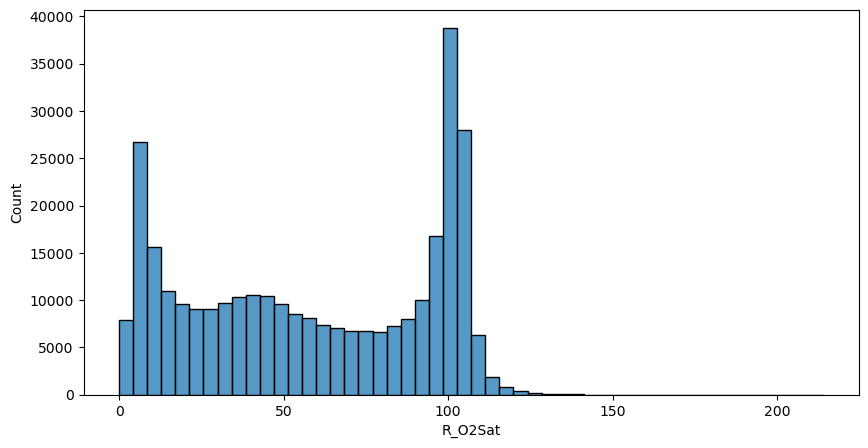

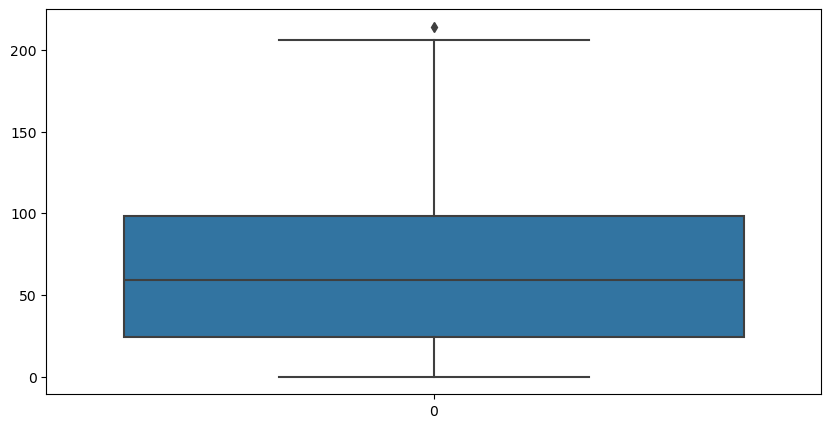

In [313]:
hist_plot(bottle_df_train['R_O2Sat'])
box_plot(bottle_df_train['R_O2Sat'])

#### R_SIO3

Reported Silicate Concentration

In [314]:
print(bottle_df_train['R_SIO3'].isnull().sum(), bottle_df_test['R_SIO3'].isnull().sum())

234871 58376


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


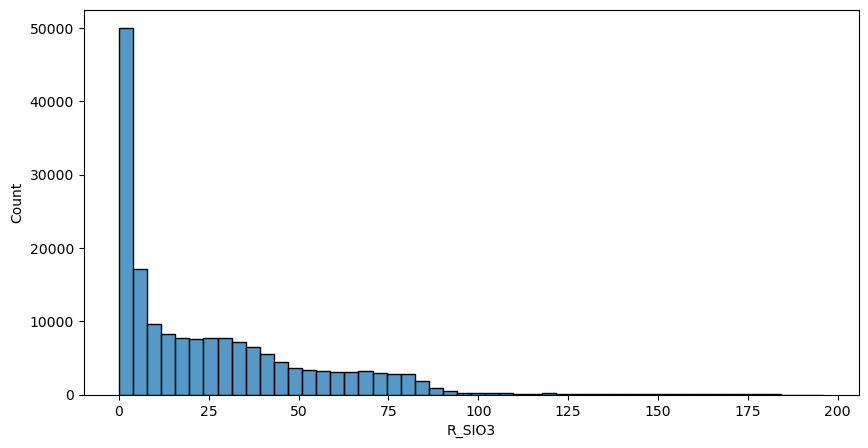

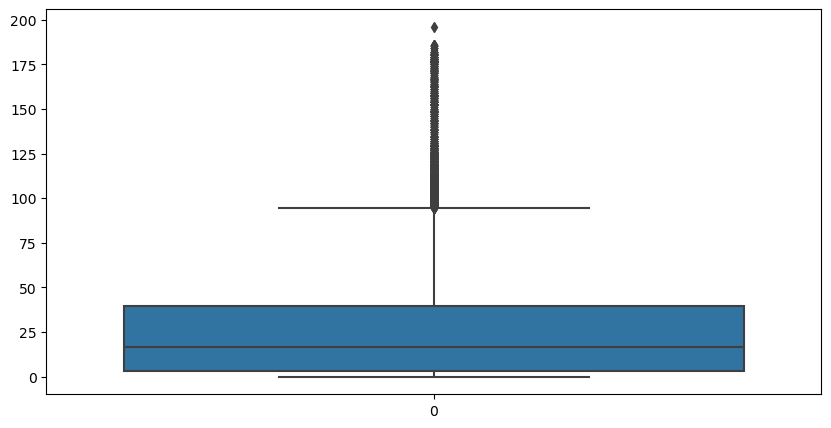

In [315]:
hist_plot(bottle_df_train['R_SIO3'])
box_plot(bottle_df_train['R_SIO3'])

#### R_PO4

Reported Phosphate Concentration

In [316]:
print(bottle_df_train['R_PO4'].isnull().sum(), bottle_df_test['R_PO4'].isnull().sum())

219287 54507


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


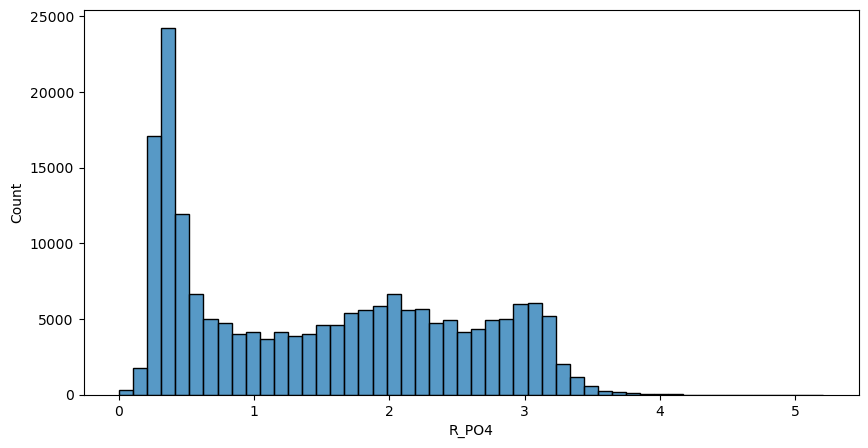

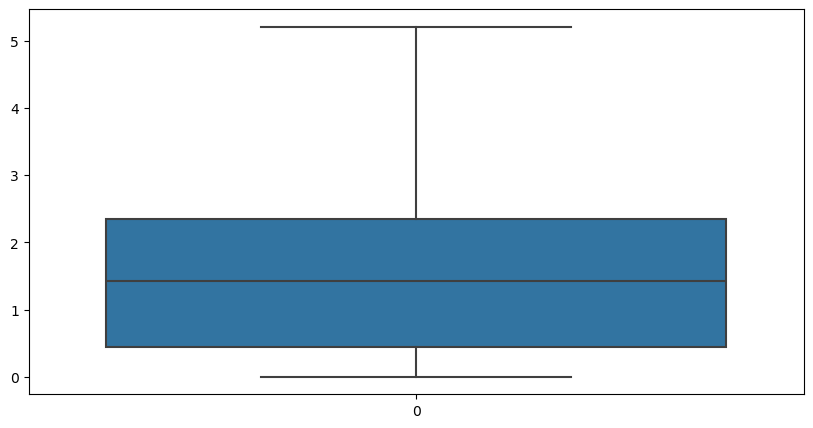

In [317]:
hist_plot(bottle_df_train['R_PO4'])
box_plot(bottle_df_train['R_PO4'])

#### R_NO3

Reported Nitrate Concentration

In [318]:
print(bottle_df_train['R_NO3'].isnull().sum(), bottle_df_test['R_NO3'].isnull().sum())

244014 60647


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


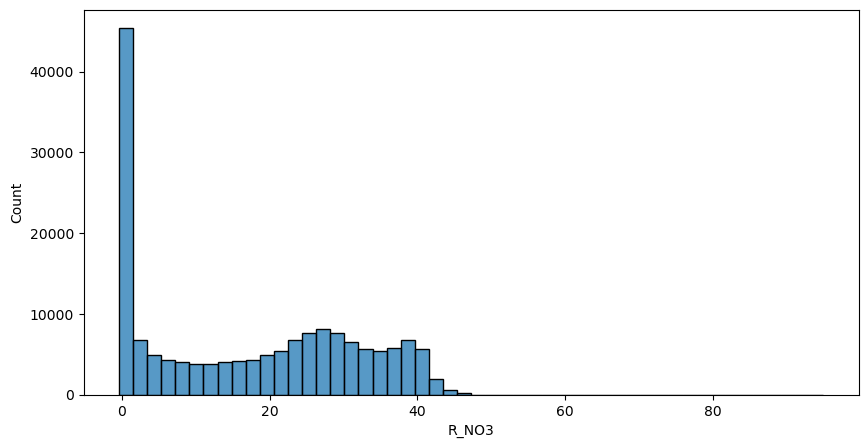

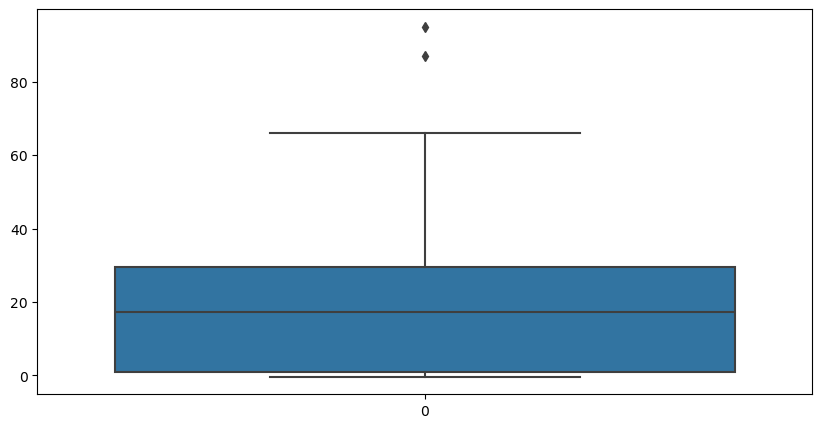

In [319]:
hist_plot(bottle_df_train['R_NO3'])
box_plot(bottle_df_train['R_NO3'])

#### R_NO2

Reported Nitrite Concentration

In [320]:
print(bottle_df_train['R_NO2'].isnull().sum(), bottle_df_test['R_NO2'].isnull().sum())

244100 60562


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


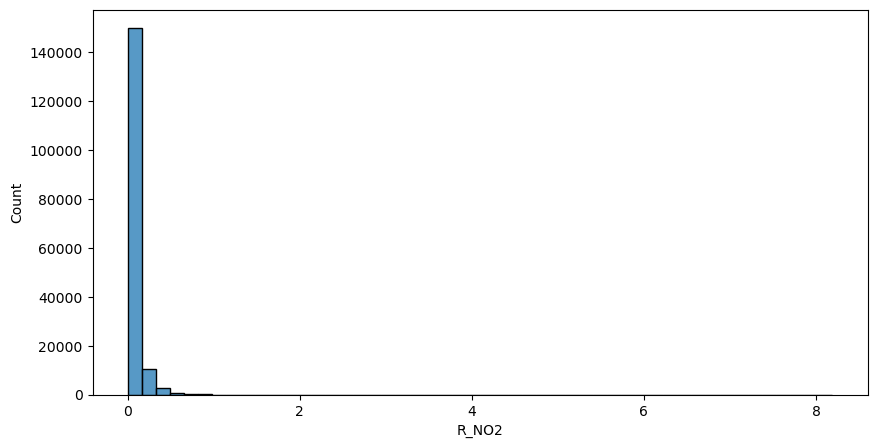

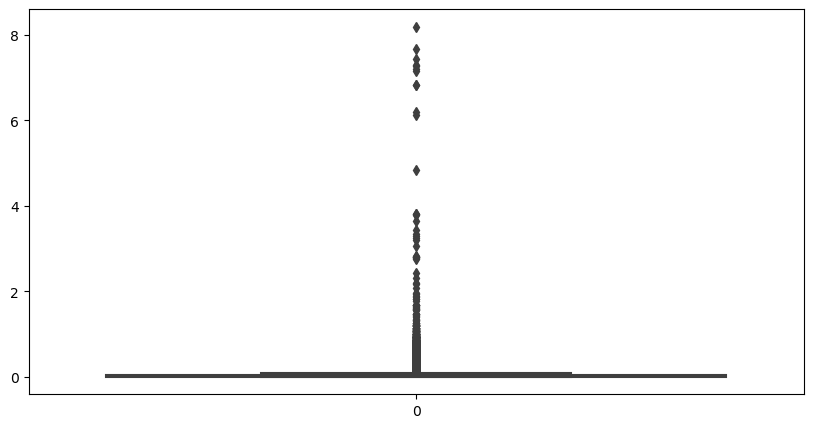

In [321]:
hist_plot(bottle_df_train['R_NO2'])
box_plot(bottle_df_train['R_NO2'])

#### R_NH4

Reported Ammonium Concentration

In [322]:
print(bottle_df_train['R_NH4'].isnull().sum(), bottle_df_test['R_NH4'].isnull().sum())

373737 93290


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


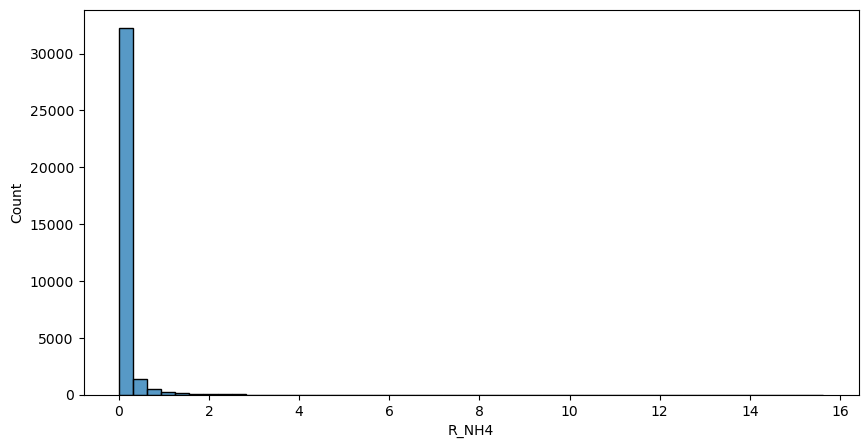

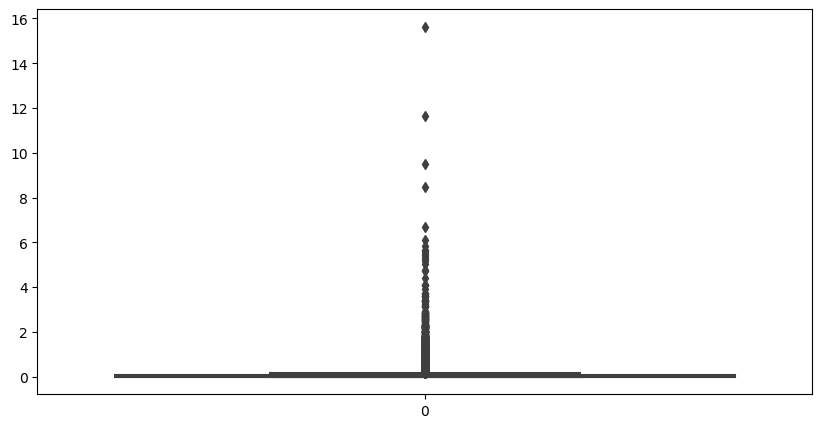

In [323]:
hist_plot(bottle_df_train['R_NH4'])
box_plot(bottle_df_train['R_NH4'])

#### R_CHLA

Reported Chlorophyll-a

In [324]:
print(bottle_df_train['R_CHLA'].isnull().sum(), bottle_df_test['R_CHLA'].isnull().sum())

292071 72860


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


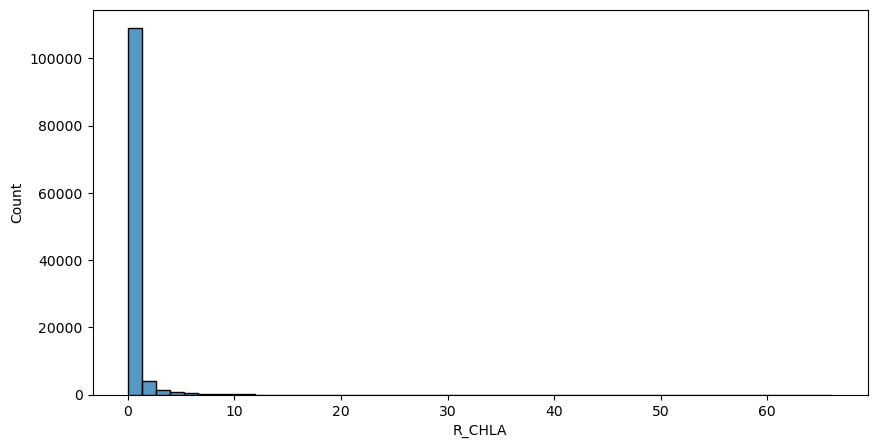

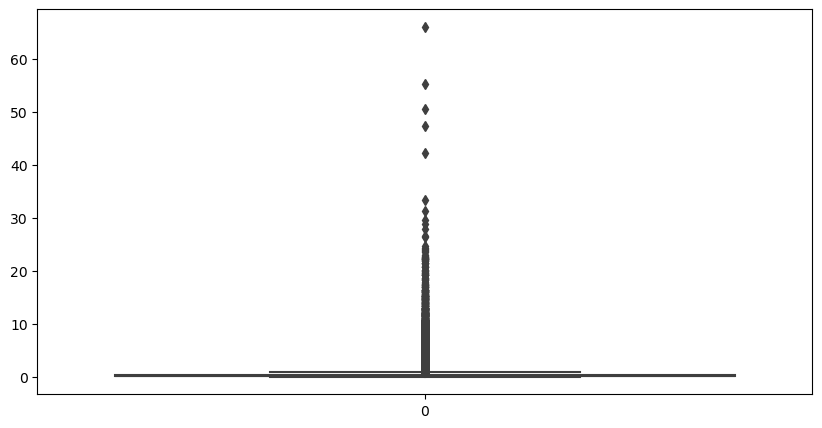

In [325]:
hist_plot(bottle_df_train['R_CHLA'])
box_plot(bottle_df_train['R_CHLA'])

#### R_PHAEO

Reported Phaeophytin

Some of the values are negative. Replace them with NaN.

In [326]:
print(bottle_df_train[bottle_df_train['R_PHAEO'] < 0].shape, bottle_df_test[bottle_df_test['R_PHAEO'] < 0].shape)

bottle_df_train.loc[bottle_df_train['R_PHAEO'] < 0, 'R_PHAEO'] = np.nan
bottle_df_test.loc[bottle_df_test['R_PHAEO'] < 0, 'R_PHAEO'] = np.nan

print(bottle_df_train[bottle_df_train['R_PHAEO'] < 0].shape, bottle_df_test[bottle_df_test['R_PHAEO'] < 0].shape)

(25, 18) (4, 18)
(0, 18) (0, 18)


In [327]:
print(bottle_df_train['R_PHAEO'].isnull().sum(), bottle_df_test['R_PHAEO'].isnull().sum())

292098 72866


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


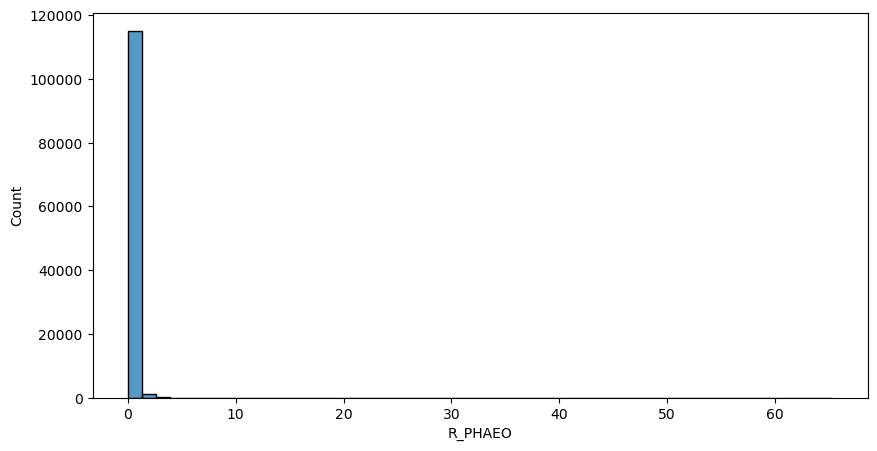

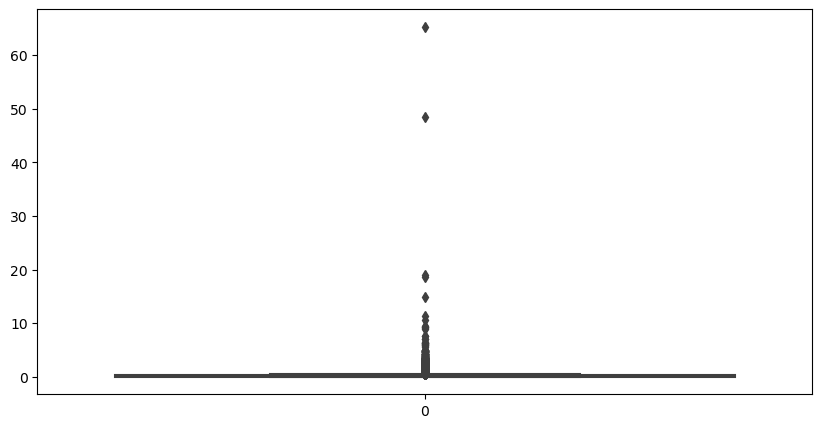

In [328]:
hist_plot(bottle_df_train['R_PHAEO'])
box_plot(bottle_df_train['R_PHAEO'])

#### Lat_Dec
Latitude

In [329]:
print(bottle_df_train['Lat_Dec'].isnull().sum(), bottle_df_test['Lat_Dec'].isnull().sum())

0 0


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


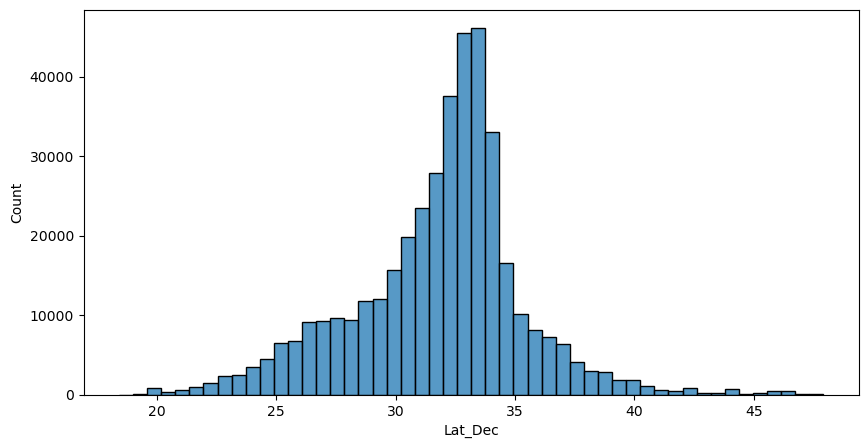

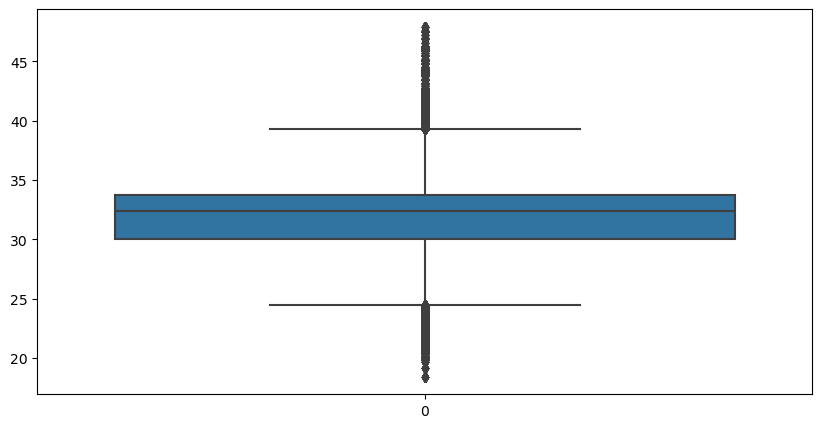

In [330]:
hist_plot(bottle_df_train['Lat_Dec'])
box_plot(bottle_df_train['Lat_Dec'])

#### Lon_Dec
Longitude

In [331]:
print(bottle_df_train['Lon_Dec'].isnull().sum(), bottle_df_test['Lon_Dec'].isnull().sum())

0 0


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


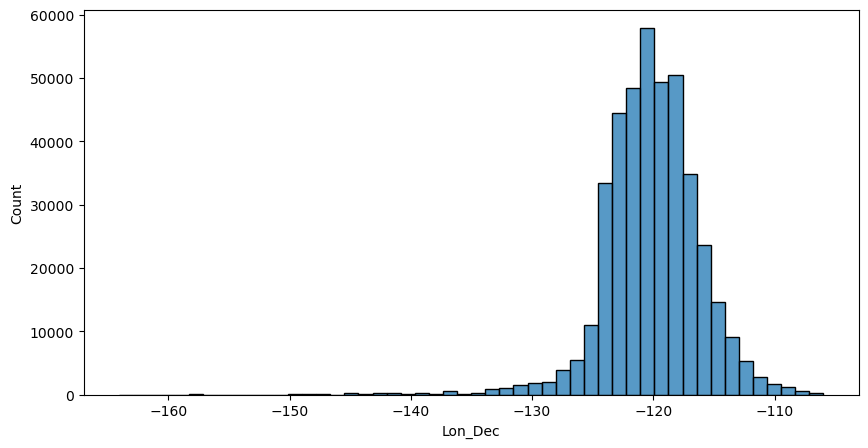

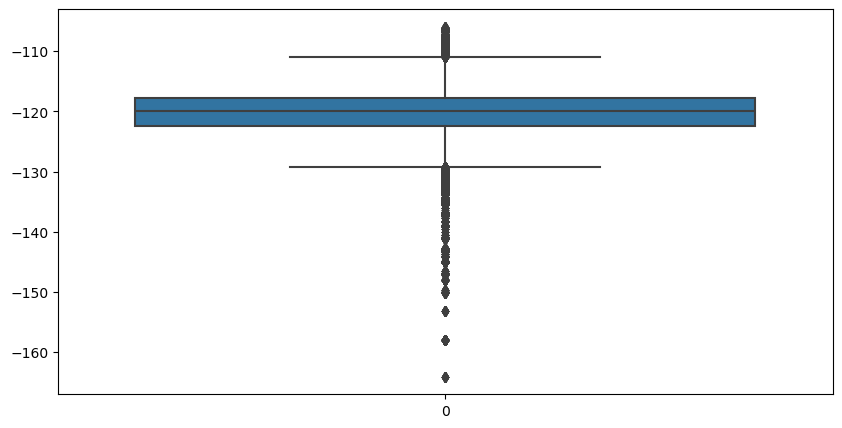

In [332]:
hist_plot(bottle_df_train['Lon_Dec'])
box_plot(bottle_df_train['Lon_Dec'])

## Save the data

Save train and test split in separate files.

In [333]:
bottle_df_train.to_csv(f'../data/train.csv')
bottle_df_test.to_csv(f'../data/test.csv')